<a href="https://colab.research.google.com/github/Sopralapanca/TwitterDataset-DM-Project/blob/main/DataMining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading the dataset and load data into dataframe

In [ ]:
users_fileid = "16b7Gbe69-SaVzGc1x3s3s7b8lzHgd5BR"
tweets_fileid = "1qYoicySRBbLi9Y8ZytMEi9ee2dIhxxUe"

!gdown --id $users_fileid
!gdown --id $tweets_fileid

USERS CSV

1. User Id: a unique identifier of the user
2. Statues Count: the count of the tweets made by the user at the moment of data
crawling
3. Lang: the user’s language selected
4. Created at: the timestamp in which the profile was created
5. Label: a binary variable that indicates if a user is a bot or a genuine user

TWEETS CSV

1. ID: a unique identifier for the tweet
2. User Id: a unique identifier for the user who wrote the tweet
3. Retweet count: number of retweets for the tweet in analysis
4. Reply count: number of reply for the tweet in analysis
5. Favorite count: number of favorites (likes) received by the tweet
6. Num hashtags: number of hashtags used in the tweet
7. Num urls: number of urls in the tweet
8. Num mentions: number of mentions in the tweet
9. Created at: when the tweet was created
10. Text: the text of the tweet

In [ ]:
import pandas as pd

max_rows = 5000

tweets_df = pd.read_csv("/content/tweets.csv", nrows=max_rows)
users_df = pd.read_csv("/content/users.csv", nrows=max_rows)


## Print info about the dataset

In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5000 non-null   object
 1   user_id         4906 non-null   object
 2   retweet_count   4834 non-null   object
 3   reply_count     4755 non-null   object
 4   favorite_count  4753 non-null   object
 5   num_hashtags    4583 non-null   object
 6   num_urls        4750 non-null   object
 7   num_mentions    4681 non-null   object
 8   created_at      5000 non-null   object
 9   text            4792 non-null   object
dtypes: object(10)
memory usage: 390.8+ KB


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5000 non-null   int64  
 1   name            4999 non-null   object 
 2   lang            5000 non-null   object 
 3   bot             5000 non-null   int64  
 4   created_at      5000 non-null   object 
 5   statuses_count  4813 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [ ]:
users_df.isna().any()

id                False
name               True
lang              False
bot               False
created_at        False
statuses_count     True
dtype: bool

In [ ]:
tweets_df.isna().any()

id                False
user_id            True
retweet_count      True
reply_count        True
favorite_count     True
num_hashtags       True
num_urls           True
num_mentions       True
created_at        False
text               True
dtype: bool

As shown above there are some null values inside the two dataframes. Furthermore, the type of the column values is 'object' even for columns that should only have numeric values such as 'id', 'user_id' and others. This means that some values in the respective columns are not integers but strings or something else. The data is therefore to be cleaned.

In [ ]:
tweets_df.head(5)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
1,583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
2,461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
3,528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
4,575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [ ]:
users_df.head(5)

,id,name,lang,bot,created_at,statuses_count
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


## Checking NaN and duplicates

**DA FARE **

## TUTTO QUELLO CHE È QUA SOTTO È IL MIO VECCHIO CODICE NON CANCELLARE, DA MODIFICARE E INTEFRARE CON IL NOTEBOOK

In [ ]:
users_df["created_at"]=pd.to_datetime(users_df["created_at"], errors='coerce', yearfirst=True)

In [ ]:
users_df.describe()

,bot,statuses_count
count,11508.000000,11109.000000
mean,0.531456,5883.312359
std,0.499031,19073.007305
min,0.000000,0.000000
25%,0.000000,41.000000
50%,1.000000,68.000000
75%,1.000000,2916.000000
max,1.000000,399555.000000


In [ ]:
users_df.head(5)

,name,lang,bot,created_at,statuses_count
id,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [ ]:
#print distinct value for each column of small_tweets_df
for col in small_tweets_df.columns:
  print(f"column: {col} values: {small_tweets_df[col].unique()}")

column: user_id values: ['798613004' '557639325' '270494010' ... 'lemziw' '9nzqd' '0w6']
column: retweet_count values: ['1' '0' '5' ... '7brv' 'd2f' '093b13axt']
column: reply_count values: ['0' 'v4ec' '0.0' ... 'nmwx' '4iw8cgyi1' 'iptj9']
column: favorite_count values: ['0' '1' '2' ... '0im' 't30k' 'o8h75gi']
column: num_hashtags values: ['0' '7' '1' ... 'f2qpm' 'nb10m' 'u40']
column: num_urls values: ['0' '1' nan ... 'j7gm8ml1a' 'fhc' '4zqi4']
column: num_mentions values: ['1' '0' '2' ... 'ttprcxgpup' 'tfgf7m5' '3f6nithk']
column: created_at values: ['2020-04-23 10:35:21' '2020-01-31 11:17:16' '2017-03-04 10:37:42' ...
 '2019-09-25 18:35:01' '2014-06-12 19:49:08' '2019-06-22 16:39:58']
column: text values: ['All the best on your bdy bro @zakijufri' 'Quirino ltr. :)'
 'Hahaha word ik opgebeld voor zorgtoestag.nl waar ik me eerst ingescreven had, ja gegevens weggevallen dit dat. Ik zei uuhm heb ik zelf al'
 ... 'SUMMER? BRING IT ON!' '@TheGrillingDad ahh'
 '@MsDeeCM they are cooler :)'

In [ ]:
#print distinct value for each column of users_df
for col in users_df.columns:
  print(f"column: {col} values: {users_df[col].unique()}")

column: name values: ['Lamonica Raborn' 'Lourie Botton' 'Dadan Syarifudin' ...
 'ALMA LETICIA NUÑO ' 'Minnie Guadagno' 'Corvanna ']
column: lang values: ['en' 'it' 'fr' 'ru' 'es' 'tr' 'en-gb' 'pt' 'nl' 'id' 'zh-tw' 'ja' 'de'
 'ko' 'en-AU' 'da' 'ar' 'en-GB' 'Select Language...' 'zh-TW' 'zh-cn' 'pl'
 'el' 'fil' 'sv' 'xx-lc']
column: bot values: [1 0]
column: created_at values: ['2019-02-22T18:00:42.000000000' '2019-02-26T03:02:32.000000000'
 '2015-04-30T07:09:56.000000000' ... '2015-03-29T17:01:24.000000000'
 '2019-03-13T02:44:13.000000000' '2017-11-09T23:24:16.000000000']
column: statuses_count values: [7.6000e+01 5.4000e+01 3.0000e+00 ... 1.1688e+04 3.0240e+03 5.2790e+03]


In [ ]:
# covert small_tweets_df columns from object to numeric. If a value can't be converted to integer
# a NaN is inserted

columns = ["user_id", "retweet_count", "reply_count",
           "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

#counting the number of nan
for col in columns:
 small_tweets_df[col]=pd.to_numeric(small_tweets_df[col], errors='coerce', downcast='integer')

In [ ]:
for col in small_tweets_df.columns:
  print(f"column: {col} NaN: {small_tweets_df[col].isna().sum()}")

column: user_id NaN: 86461
column: retweet_count NaN: 125302
column: reply_count NaN: 162647
column: favorite_count NaN: 161864
column: num_hashtags NaN: 232913
column: num_urls NaN: 161712
column: num_mentions NaN: 197282
column: created_at NaN: 0
column: text NaN: 107558


In [ ]:
#drop rows with nan values. If any of the value of a row is a nan, the entire row is dropped
small_tweets_df_nona = small_tweets_df.dropna(inplace=False)
#counting the number of nan
for col in small_tweets_df_nona.columns:
  print(f"column: {col} NaN: {small_tweets_df_nona[col].isna().sum()}")

column: user_id NaN: 0
column: retweet_count NaN: 0
column: reply_count NaN: 0
column: favorite_count NaN: 0
column: num_hashtags NaN: 0
column: num_urls NaN: 0
column: num_mentions NaN: 0
column: created_at NaN: 0
column: text NaN: 0


In [ ]:
small_tweets_df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2355606 entries, 590826213754556417 to 591541311523590145
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         float64
 1   retweet_count   float64
 2   reply_count     float64
 3   favorite_count  float64
 4   num_hashtags    float64
 5   num_urls        float64
 6   num_mentions    float64
 7   created_at      object 
 8   text            object 
dtypes: float64(7), object(2)
memory usage: 179.7+ MB


In [ ]:
small_tweets_df_nona = small_tweets_df_nona.astype({
"user_id":int, "retweet_count":int, "reply_count":int,
           "favorite_count":int, "num_hashtags":int,  "num_urls":int, "num_mentions":int    
}, errors="ignore")

In [ ]:
small_tweets_df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2355606 entries, 590826213754556417 to 591541311523590145
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   retweet_count   int64 
 2   reply_count     int64 
 3   favorite_count  int64 
 4   num_hashtags    int64 
 5   num_urls        int64 
 6   num_mentions    int64 
 7   created_at      object
 8   text            object
dtypes: int64(7), object(2)
memory usage: 179.7+ MB


In [ ]:
small_tweets_df_nona.describe()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,2.355606e+06,2.355606e+06,2.355606e+06,2.355606e+06,2.355606e+06,2.355606e+06,2.355606e+06
mean,8.292123e+08,5.680416e+02,2.256914e-02,2.973501e+03,-3.915499e+12,1.509299e+03,5.409270e-01
std,8.517246e+08,1.401362e+04,1.089636e+01,4.560860e+06,6.009501e+15,2.280710e+06,9.486533e+00
min,5.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-9.223372e+18,0.000000e+00,0.000000e+00
25%,2.312573e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.680718e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.223670e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,3.164942e+09,3.350111e+06,1.124200e+04,7.000000e+09,4.000000e+09,3.500000e+09,9.818000e+03


In [ ]:
small_tweets_df_nona.head(10)

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
590826213754556417,798613004,1,0,0,0,0,1,2020-04-23 10:35:21,All the best on your bdy bro @zakijufri
560758570732367872,557639325,0,0,0,0,0,0,2020-01-31 11:17:16,Quirino ltr. :)
175530312707751936,270494010,0,0,0,0,0,0,2017-03-04 10:37:42,Hahaha word ik opgebeld voor zorgtoestag.nl wa...
583758388913446912,1088449490,5,0,0,0,0,1,2020-04-03 22:30:20,"RT @ProyectoMagcon: Grupo 5: ""I won't let you ..."
467837272826466305,15324749,0,0,0,0,0,1,2019-05-20 01:21:12,@sarabeee correct.
454335875556470784,385121466,1,0,0,0,0,1,2019-04-12 19:11:28,@___shortfordays thanks for the follow don't b...
583749852950953984,3018260990,0,0,1,0,0,1,2020-04-03 21:56:25,"@Bexofeasttex It was her smell too, like sulph..."
583188740039917568,1492569428,0,0,0,0,0,1,2020-04-02 08:46:45,@fxckthisshit_ i know babe xx
174771895927980032,41825429,1,0,0,0,1,2,2017-03-02 08:24:01,@urNaughtyAngel @pleasurechestla no but here ...


In [ ]:
small_tweets_df_nona["user_id"].value_counts()

157029836     968
491630583     968
1712224658    959
486172124     950
161634919     931
             ... 
277203011       1
1175901596      1
2897127823      1
67041122        1
1174944751      1
Name: user_id, Length: 11304, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4f87ea5b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4f87beffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4f87ead350>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4f87bf3f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4f87bf36d0>],
 'means': []}

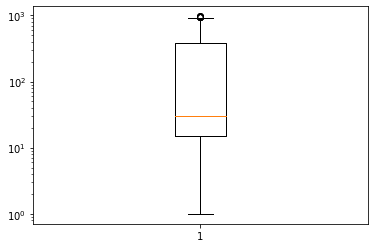

In [ ]:
plt.yscale("log")
plt.boxplot(small_tweets_df_nona["user_id"].value_counts())

In [ ]:
#drop rows with nan values. If any of the value of a row is a nan, the entire row is dropped
users_df_nona = users_df.dropna(inplace=False)

users_df_nona["lang"].value_counts()

en                    9590
it                     906
es                     306
pt                      62
en-gb                   50
ru                      40
fr                      35
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
zh-TW                    3
da                       2
Select Language...       2
ar                       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

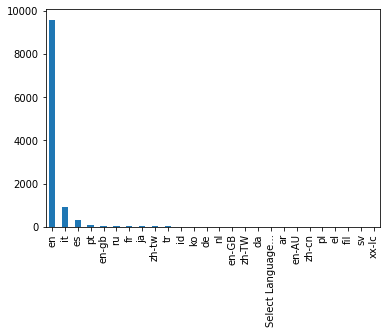

In [ ]:
users_df_nona["lang"].value_counts().plot.bar()

In [ ]:
users_df_nona['month_year'] = users_df_nona['created_at'].dt.to_period('M')
print(users_df_nona['month_year'])

id
2353593986    2019-02
2358850842    2019-02
137959629     2015-04
466124818     2017-01
2571493866    2019-06
               ...   
2911861962    2019-11
1378532629    2018-04
126984069     2015-03
2383025796    2019-03
933183398     2017-11
Name: month_year, Length: 11108, dtype: period[M]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


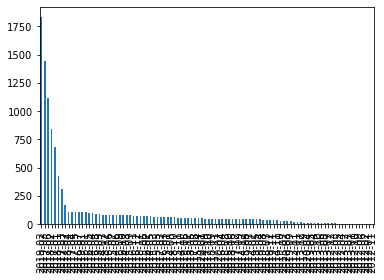

In [ ]:
users_df_nona["month_year"].value_counts().plot.bar()